In [37]:
#Импортируем библиотеки, загружаем датасэт, с указанием параметра для определения формата даты 
import pandas as pd
import seaborn as sns
taxi = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/5OUzhWvyi0n1DA', sep = ';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [38]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [48]:
#с какой платформы было сделано больше всего заказов, в процентах, округлям до целого
taxi.source.value_counts(normalize=True).mul(100).round(2)

iPhone     42.37
web        33.20
Android    21.35
iPad        2.48
Wap         0.59
Name: source, dtype: float64

Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируем данные и строим барчарт, где по оси `x` будет расположено название платформы (`source`), а по оси `y` – количество заказов (абсолютные значения).

In [78]:
#Первый этап данного задания – агрегировать данные, т.е. посчитать с какой платформы было сделано больше всего заказов. В предыдущем задании ответ нужно было указать в %, но здесь этого не требуется.

taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() # сбрасываем индекс
               .rename({'index':'source', 'source':'cnt'}, axis='columns')  # меняем значения на читаемые
              )

Теперь переходим к построению графика. Для того, чтобы построить барчарт, нам понадобится `sns.barplot()`. В качестве параметров укажем:

* `x = 'source'` – т.к. по оси x нужно расположить название платформы
* `y = 'cnt'` – т.к. по оси y – количество заказов
* `data = taxi_counts` – датафрейм, из которого берем данные
Также можем добавить названия осей с помощью `ax.set(xlabel='Platform', ylabel='Count')`, и для красоты убрать часть рамки с помощью `sns.despine()`

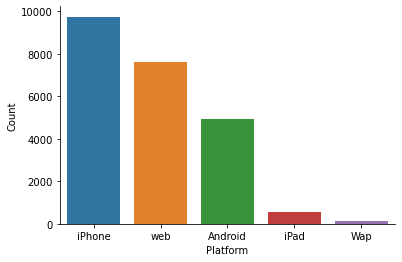

In [79]:
ax = sns.barplot(x='source', y='cnt', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

#По значениям – самое большое у iPhone в районе 10000 

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

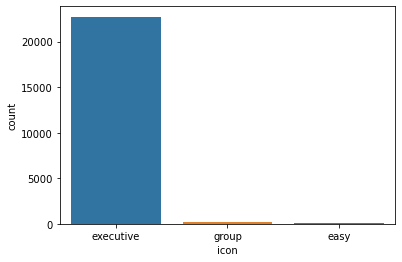

In [80]:
#Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.
#Выясним, какой тип поездки (`icon`) встречался чаще всего.
sns.countplot(taxi['icon'])

In [ ]:
#С помощью sns.countplot и параметра hue визуализируем распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source). 
#Иными словами, по оси x расположим платформу, а в качестве цвета используем состояние заказа.

<AxesSubplot:xlabel='end_state', ylabel='count'>

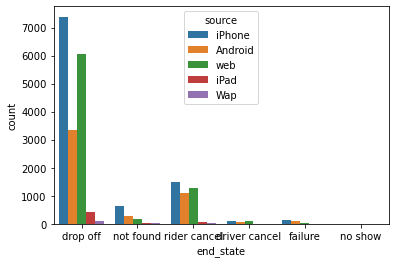

In [43]:
sns.countplot(x = 'end_state', hue = 'source', data = taxi)

Проверим, как распределены оценки водителей (`driver_score`). Для подготовки данных выполняем следующие шаги:

1. Посчитайте _частоту_ встречаемости каждой из оценок  
2. Переведите в проценты и округлите до 2 знаков после точки (`.mul(100).round(2)`)  
3. Сбросьте индексы   
4. Переименуйте колонки в `driver_score` и `percentage`  
5. Отсортируйте по `driver_score` в порядке возрастания (от 0 до 5)  
6. Запишите результат в `driver_score_counts`  

### Полезные функции:

`.mul()` – умножение, более удобный вариант для использования в цепочке методов 
`.round()` – округление
`.reset_index()` – сбросить индекс
`.value_counts()` – сколько раз встречается каждое значение переменной

In [76]:
scores = taxi.driver_score.value_counts(normalize=True).mul(100).round(2).reset_index()
scores

,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [74]:
scores = scores.rename(columns = {'driver_score': 'percentage', 'index': 'driver_score'})
scores

,percentage,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [67]:
driver_score_counts = scores.sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


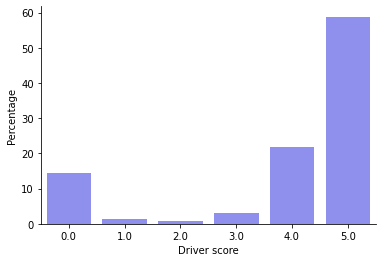

In [69]:
#Теперь строим график! Сначала импортируем библиотеки:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [71]:
#Проделаем аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
#Определим в чем его отличие от распределения оценок водителей.

rider_scores = taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index()
rider_scores = rider_scores.rename(columns = {'rider_score': 'percentage', 'index': 'rider_score'})
rider_score_counts = rider_scores.sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


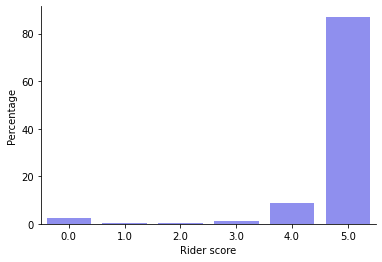

In [73]:
bx = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
bx.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()